## EDA Preliminar

Voy a tomar un archivo de reviews de cada estado acotado en el alcance del proyecto del dataset de Google Maps y lo voy a analizar

**California**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(palette='husl')

In [2]:
r_california=pd.read_json('../PG Datasets/review-California/1.json',lines=True)

In [3]:
r_california.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


Revisando cuantos registros tengo en el datset

In [4]:
r_california.shape

(150000, 8)

Revisando la cantidad de nulos por columna

In [5]:
missing_california=r_california.isna().sum()

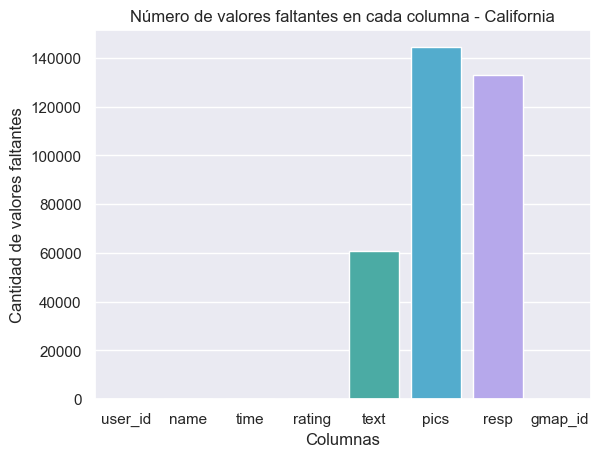

In [6]:
sns.barplot(x=missing_california.index, y=missing_california.values)
plt.title('Número de valores faltantes en cada columna - California')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

Debido a la cantidad de valores faltantes, se vana  eliminar las columnas pics y resp. A pesar de que text tiene tambien una alta cantidad de faltantes, no se va a eliminar porque son las opiniones o reviews. 

Revisando la información general de cada columna 

In [7]:
r_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     89135 non-null   object 
 5   pics     5632 non-null    object 
 6   resp     16935 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


La columna time deberia llamarse fecha y tener como tipo de dato datetime. 

Revisando valores en rating

In [8]:
ratings_frec=r_california.rating.value_counts()

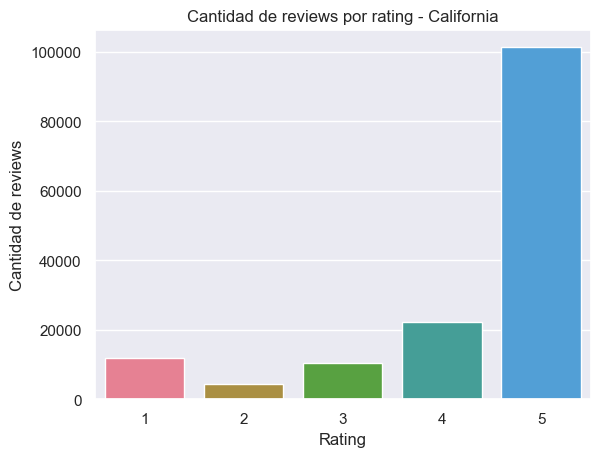

In [9]:
sns.barplot(x=ratings_frec.index, y=ratings_frec.values)
plt.title('Cantidad de reviews por rating - California')
plt.xlabel('Rating')
plt.ylabel('Cantidad de reviews')
plt.show()

Representando valores atipicos

<AxesSubplot: xlabel='rating'>

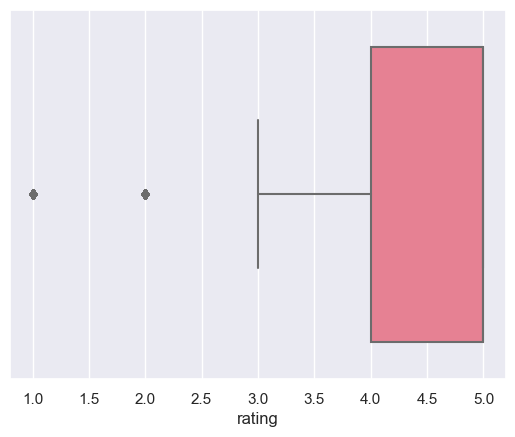

In [10]:
sns.boxplot(data=r_california,x='rating')

Convirtienedo formato fecha

In [11]:
r_california['time']=pd.to_datetime(r_california['time'], unit='ms')

In [13]:
r_california['time'].dt.year.min()

2004

In [14]:
r_california['time'].dt.year.max()

2021

Graficando reviews por año

In [16]:
yearcount=r_california['time'].dt.year.value_counts()

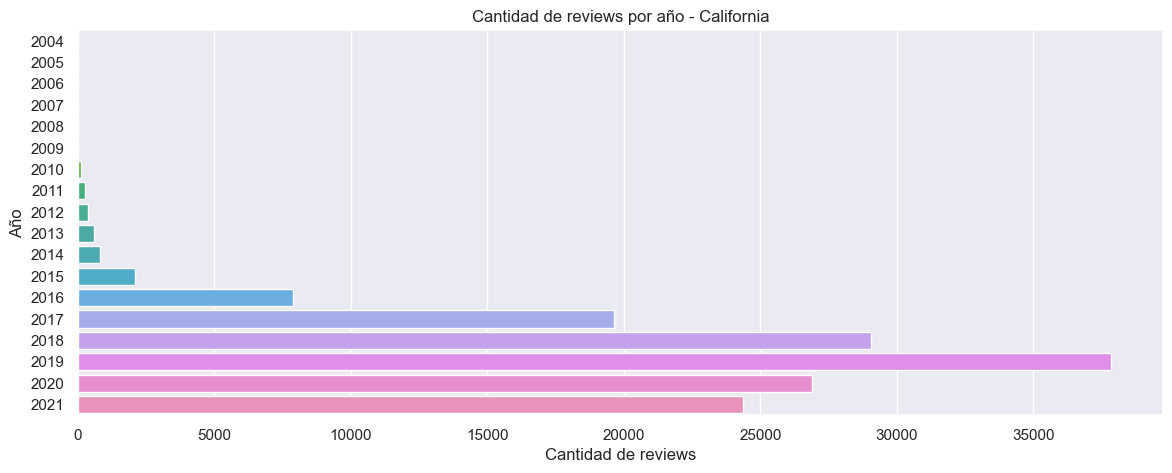

In [26]:
plt.figure(figsize=(14, 5))
sns.barplot(x=yearcount.values, y=yearcount.index, orient='h')
plt.title('Cantidad de reviews por año - California')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Año')
plt.show()

Contando duplicados

Para poder contar duplicados tengo que primero eliminar las columnas con listas

In [30]:
r_california.drop(columns=['pics', 'resp'],inplace=True)

In [46]:
duplicates = r_california.duplicated()
duplicates.sum()

14779

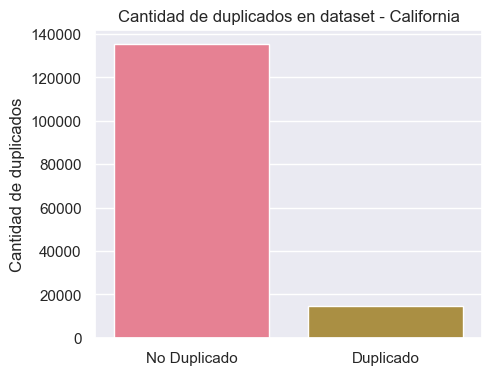

In [44]:
plt.figure(figsize=(5, 4))
sns.countplot(x=duplicates)
plt.title('Cantidad de duplicados en dataset - California')
plt.xticks([0, 1], ['No Duplicado', 'Duplicado'])
plt.ylabel('Cantidad de duplicados')
plt.show()

**Texas**

Repetimos exactamente los mismos pasos anteriores para este estado

In [47]:
r_texas=pd.read_json('../PG Datasets/review-Texas/1.json',lines=True)

In [48]:
r_texas.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.105453e+20,Kimberly Feger,1625431734826,5,"The pharmacist, Erin, is phenomenal. She was s...",None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320
1,1.036198e+20,Briana Streit,1568336283913,2,I gave them 2 stars because they offer prescri...,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320
2,1.019167e+20,Sylvia Caudillo,1519873586872,1,If I could put minus stars I would. This has t...,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320
3,1.178709e+20,Ginger Kinyon,1571638384637,1,Please fix your restroom doors,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320
4,1.103973e+20,Angeles Arellano,1546568877087,1,This pharmacy Walmart dose not work not come a...,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320


Numero de registros

In [49]:
r_texas.shape

(150000, 8)

Valores nulos

In [50]:
missing_texas=r_texas.isna().sum()

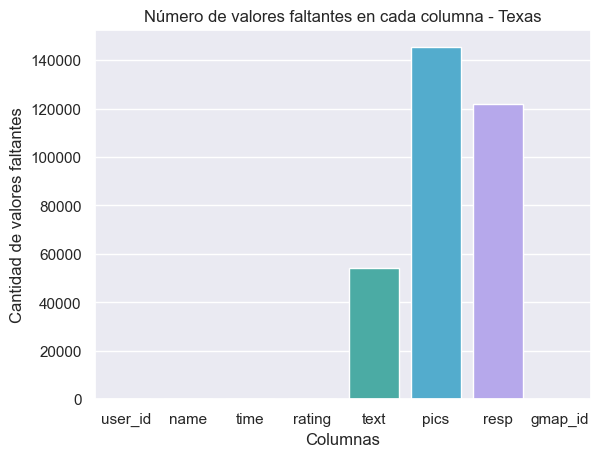

In [51]:
sns.barplot(x=missing_texas.index, y=missing_texas.values)
plt.title('Número de valores faltantes en cada columna - Texas')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

Informacion general

In [52]:
r_texas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     95777 non-null   object 
 5   pics     4631 non-null    object 
 6   resp     28224 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


Valores en rating

In [53]:
ratings_frect=r_texas.rating.value_counts()

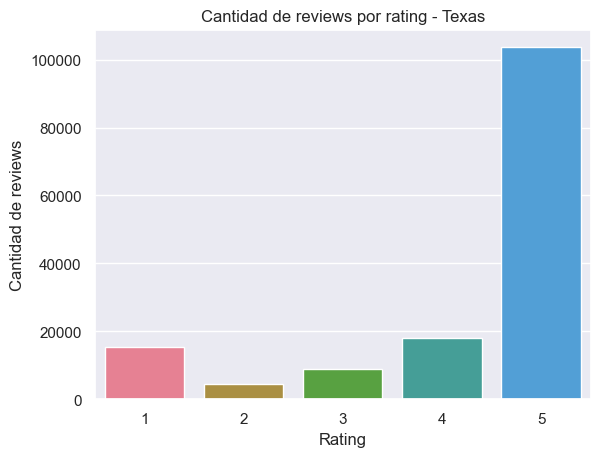

In [54]:
sns.barplot(x=ratings_frect.index, y=ratings_frect.values)
plt.title('Cantidad de reviews por rating - Texas')
plt.xlabel('Rating')
plt.ylabel('Cantidad de reviews')
plt.show()

Valores atipicos rating

<AxesSubplot: xlabel='rating'>

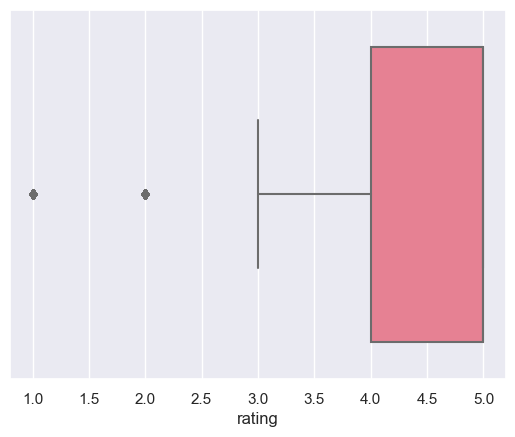

In [55]:
sns.boxplot(data=r_texas,x='rating')

Cambiando columna de time a tipo datetime

In [56]:
r_texas['time']=pd.to_datetime(r_texas['time'], unit='ms')

In [57]:
r_texas['time'].dt.year.min()

2008

In [58]:
r_texas['time'].dt.year.max()

2021

Reviews por anio

In [59]:
yearcountt=r_texas['time'].dt.year.value_counts()

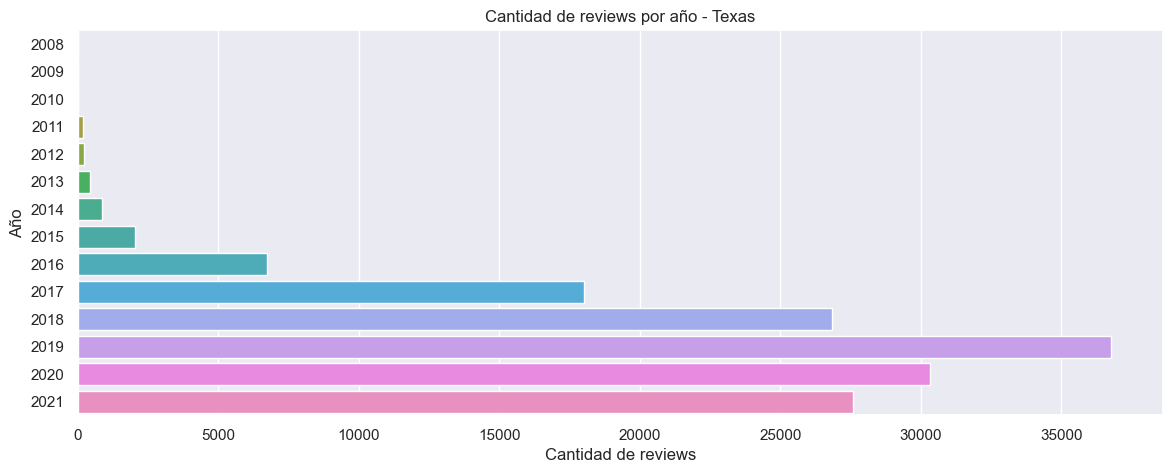

In [60]:
plt.figure(figsize=(14, 5))
sns.barplot(x=yearcountt.values, y=yearcountt.index, orient='h')
plt.title('Cantidad de reviews por año - Texas')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Año')
plt.show()

Cuenta duplicados

In [61]:
r_texas.drop(columns=['pics', 'resp'],inplace=True)

In [62]:
duplicatest = r_texas.duplicated()
duplicatest.sum()

15442

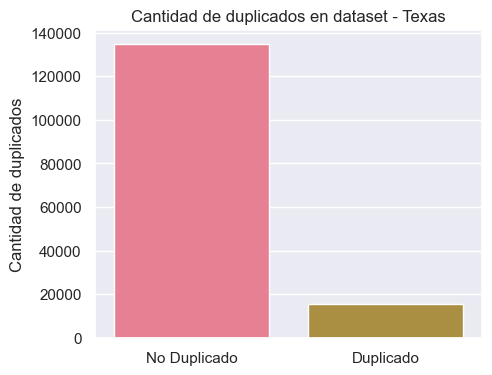

In [63]:
plt.figure(figsize=(5, 4))
sns.countplot(x=duplicatest)
plt.title('Cantidad de duplicados en dataset - Texas')
plt.xticks([0, 1], ['No Duplicado', 'Duplicado'])
plt.ylabel('Cantidad de duplicados')
plt.show()

**Florida**

In [81]:
r_florida=pd.read_json('../PG Datasets/review-Florida/1.json',lines=True)

In [82]:
r_florida.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,"{'time': 1627042799532, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,"{'time': 1582464056733, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
3,1.063444e+20,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
4,1.008751e+20,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


Numero de registros

In [83]:
r_florida.shape

(150000, 8)

Valores nulos

In [67]:
missing_florida=r_florida.isna().sum()

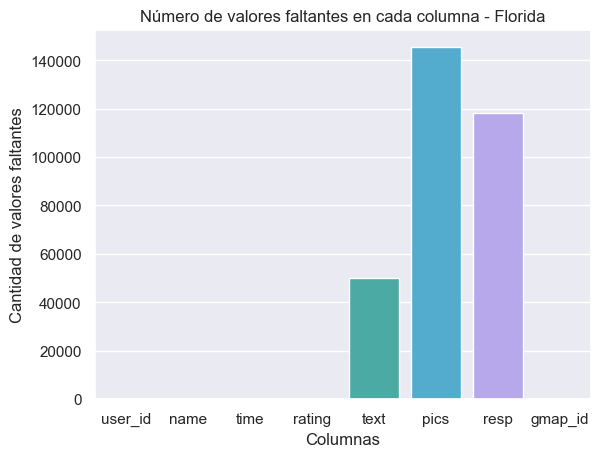

In [68]:
sns.barplot(x=missing_florida.index, y=missing_florida.values)
plt.title('Número de valores faltantes en cada columna - Florida')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

Informacion

In [69]:
r_florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     100023 non-null  object 
 5   pics     4577 non-null    object 
 6   resp     31967 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


Valores en rating

In [70]:
ratings_frecf=r_florida.rating.value_counts()

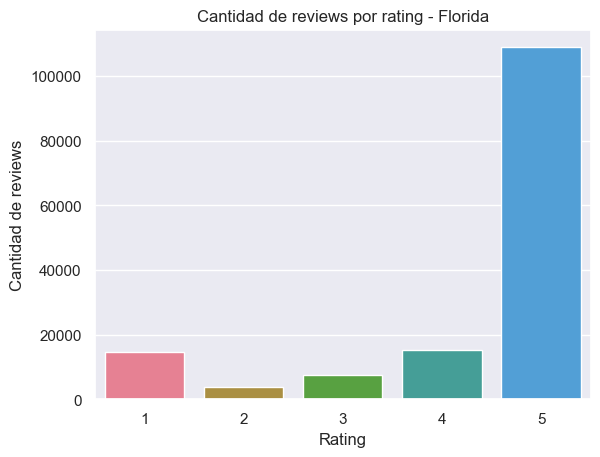

In [71]:
sns.barplot(x=ratings_frecf.index, y=ratings_frecf.values)
plt.title('Cantidad de reviews por rating - Florida')
plt.xlabel('Rating')
plt.ylabel('Cantidad de reviews')
plt.show()

<AxesSubplot: xlabel='rating'>

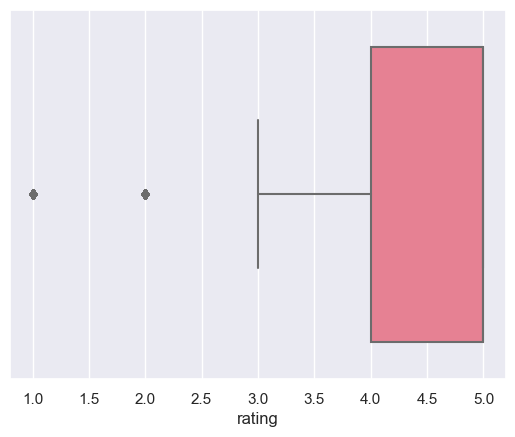

In [72]:
sns.boxplot(data=r_florida,x='rating')

Reviews por anio

In [73]:
r_florida['time']=pd.to_datetime(r_florida['time'], unit='ms')
yearcountf=r_florida['time'].dt.year.value_counts()

In [74]:
r_florida['time'].dt.year.min()

2003

In [75]:
r_florida['time'].dt.year.max()

2021

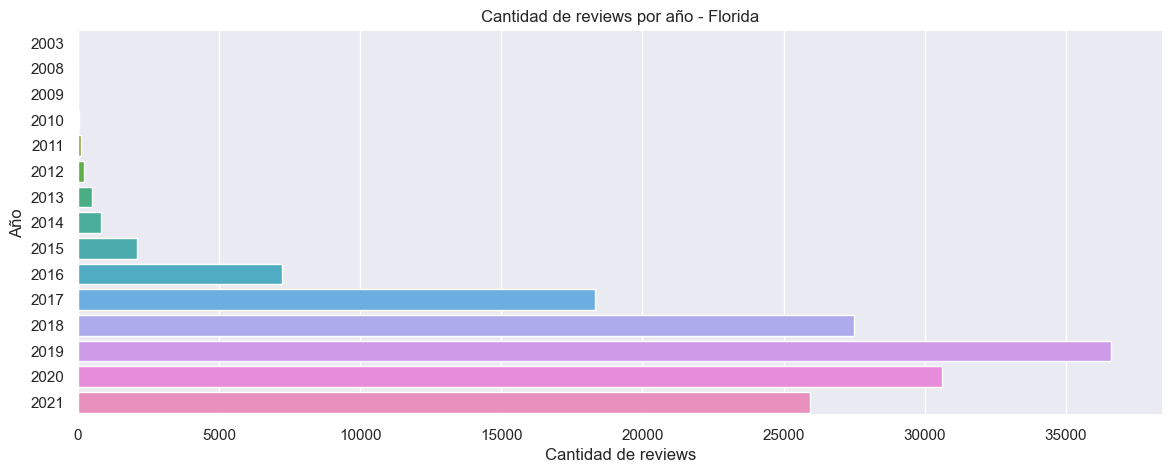

In [76]:
plt.figure(figsize=(14, 5))
sns.barplot(x=yearcountf.values, y=yearcountf.index, orient='h')
plt.title('Cantidad de reviews por año - Florida')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Año')
plt.show()

Cuenta duplicados

In [77]:
r_florida.drop(columns=['pics', 'resp'],inplace=True)
duplicatesf = r_florida.duplicated()
duplicatesf.sum()

10714

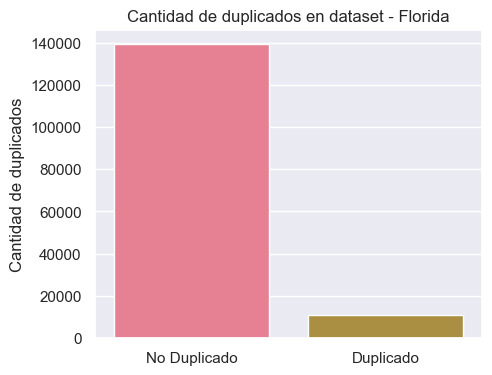

In [78]:
plt.figure(figsize=(5, 4))
sns.countplot(x=duplicatesf)
plt.title('Cantidad de duplicados en dataset - Florida')
plt.xticks([0, 1], ['No Duplicado', 'Duplicado'])
plt.ylabel('Cantidad de duplicados')
plt.show()

**New York**

In [79]:
r_ny=pd.read_json('../PG Datasets/review-New_York/1.json',lines=True)

In [80]:
r_ny.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,1.149982e+20,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,1.171782e+20,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [84]:
r_ny.shape

(150000, 8)

In [85]:
missing_ny=r_ny.isna().sum()

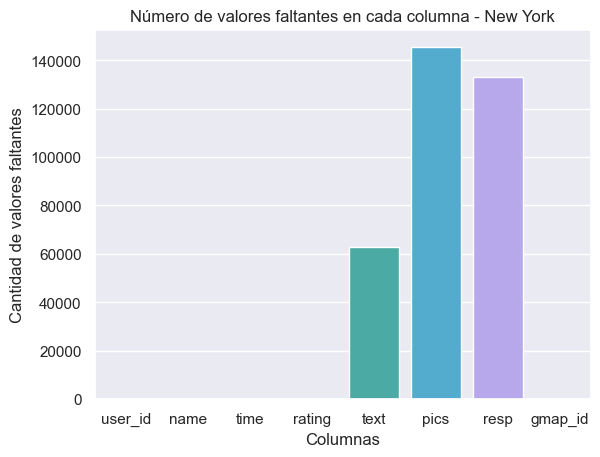

In [86]:
sns.barplot(x=missing_ny.index, y=missing_ny.values)
plt.title('Número de valores faltantes en cada columna - New York')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

In [88]:
r_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     87324 non-null   object 
 5   pics     4596 non-null    object 
 6   resp     16838 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [89]:
ratings_frecn=r_ny.rating.value_counts()

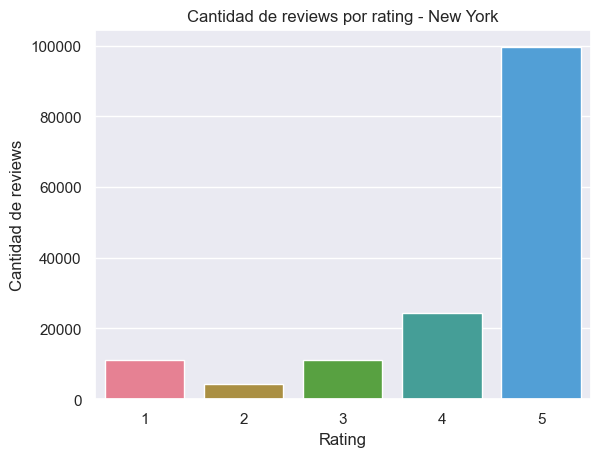

In [90]:
sns.barplot(x=ratings_frecn.index, y=ratings_frecn.values)
plt.title('Cantidad de reviews por rating - New York')
plt.xlabel('Rating')
plt.ylabel('Cantidad de reviews')
plt.show()

<AxesSubplot: xlabel='rating'>

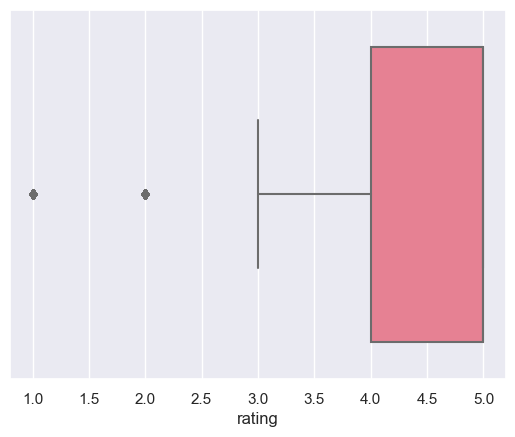

In [91]:
sns.boxplot(data=r_ny,x='rating')

In [92]:
r_ny['time']=pd.to_datetime(r_ny['time'], unit='ms')
yearcountn=r_ny['time'].dt.year.value_counts()

In [93]:
r_ny['time'].dt.year.min()

1990

In [94]:
r_ny['time'].dt.year.max()

2021

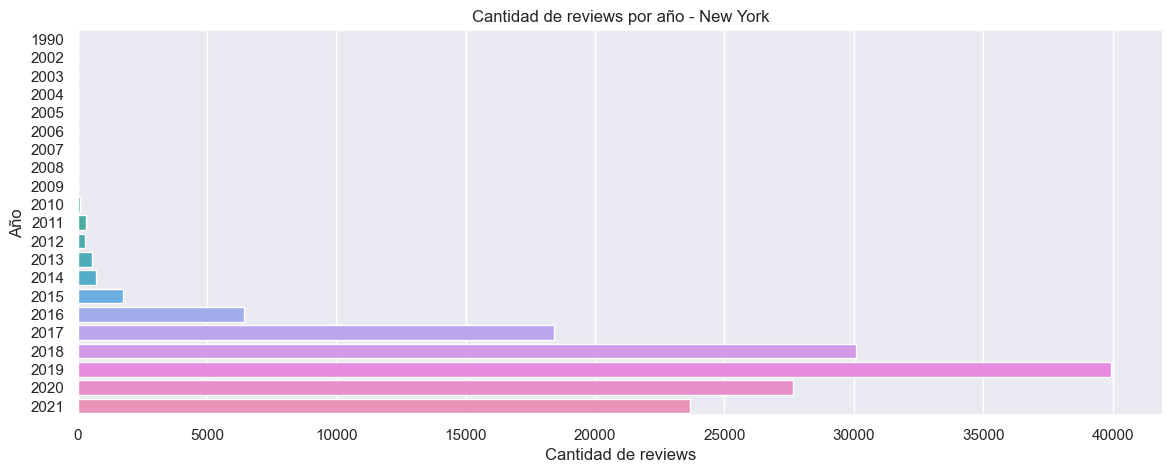

In [95]:
plt.figure(figsize=(14, 5))
sns.barplot(x=yearcountn.values, y=yearcountn.index, orient='h')
plt.title('Cantidad de reviews por año - New York')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Año')
plt.show()

In [96]:
r_ny.drop(columns=['pics', 'resp'],inplace=True)
duplicatesn = r_ny.duplicated()
duplicatesn.sum()

7970

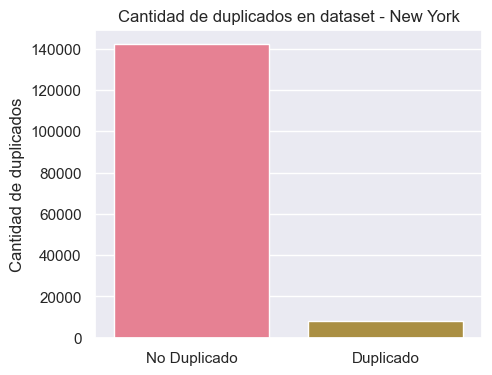

In [97]:
plt.figure(figsize=(5, 4))
sns.countplot(x=duplicatesn)
plt.title('Cantidad de duplicados en dataset - New York')
plt.xticks([0, 1], ['No Duplicado', 'Duplicado'])
plt.ylabel('Cantidad de duplicados')
plt.show()

Pennsylvania

In [98]:
r_penn=pd.read_json('../PG Datasets/review-Pennsylvania/1.json',lines=True)

In [106]:
r_penn.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.049447e+20,Jaron Whitfield,1517731762839,5,"Joe is quite unique of his line of work, he as...",None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
1,1.176097e+20,Jonathan McCarthy,1476276291163,5,For such a small place their impact on my life...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
2,1.105632e+20,Rocky Kev,1338826945578,5,I usually give them a call before I stop by to...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
3,1.128960e+20,Josep Valls,1363286110554,5,My bike had been sitting outdoors for a good w...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
4,1.106197e+20,Timaree Schmit,1548798329760,5,Always an easy experience. Service is knowledg...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb


In [100]:
r_penn.shape

(150000, 8)

In [101]:
missing_penn=r_penn.isna().sum()

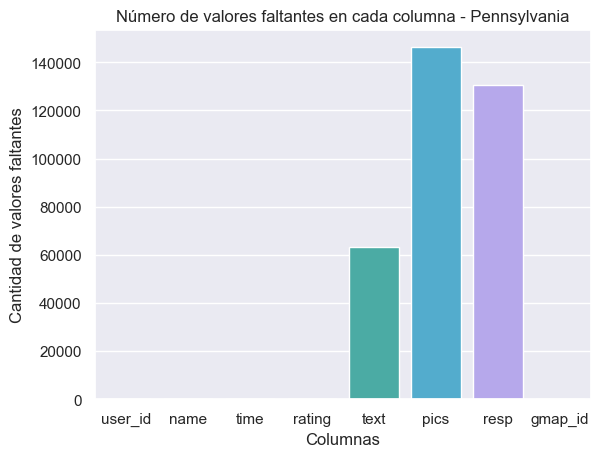

In [102]:
sns.barplot(x=missing_penn.index, y=missing_penn.values)
plt.title('Número de valores faltantes en cada columna - Pennsylvania')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

In [103]:
r_penn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     86600 non-null   object 
 5   pics     3698 non-null    object 
 6   resp     19530 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [104]:
ratings_frecp=r_penn.rating.value_counts()

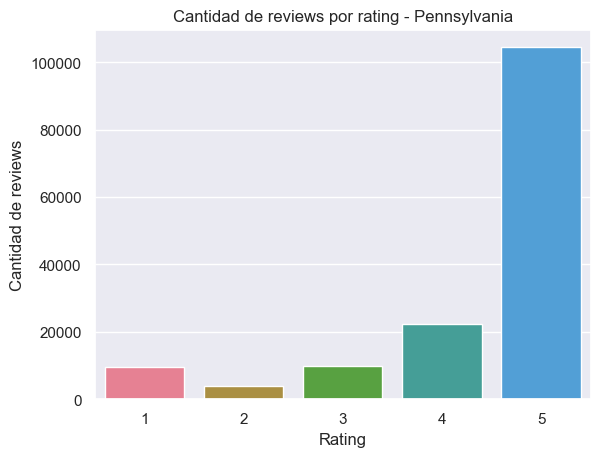

In [105]:
sns.barplot(x=ratings_frecp.index, y=ratings_frecp.values)
plt.title('Cantidad de reviews por rating - Pennsylvania')
plt.xlabel('Rating')
plt.ylabel('Cantidad de reviews')
plt.show()

<AxesSubplot: xlabel='rating'>

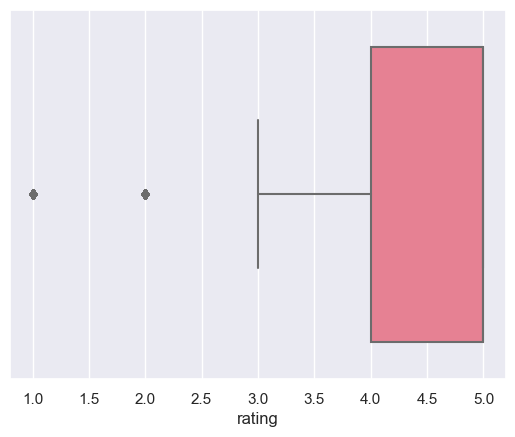

In [107]:
sns.boxplot(data=r_penn,x='rating')

In [108]:
r_penn['time']=pd.to_datetime(r_penn['time'], unit='ms')
yearcountp=r_penn['time'].dt.year.value_counts()

In [109]:
r_penn['time'].dt.year.min()

1990

In [111]:
r_penn['time'].dt.year.max()

2021

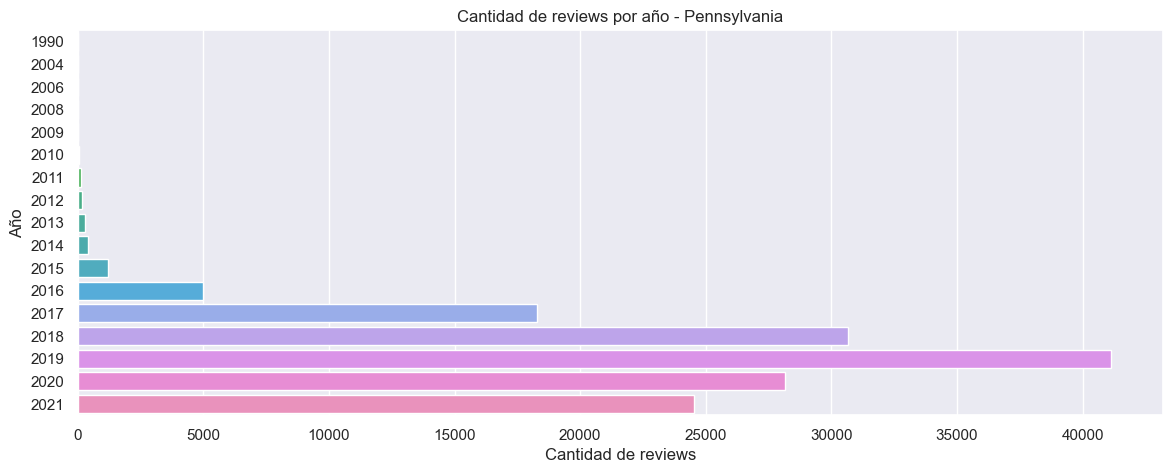

In [112]:
plt.figure(figsize=(14, 5))
sns.barplot(x=yearcountp.values, y=yearcountp.index, orient='h')
plt.title('Cantidad de reviews por año - Pennsylvania')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Año')
plt.show()

In [113]:
r_penn.drop(columns=['pics', 'resp'],inplace=True)
duplicatesp = r_penn.duplicated()
duplicatesp.sum()

5133

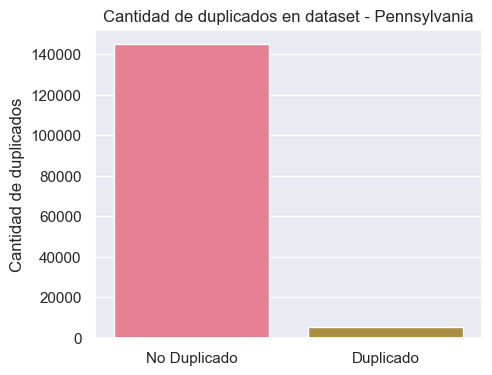

In [114]:
plt.figure(figsize=(5, 4))
sns.countplot(x=duplicatesp)
plt.title('Cantidad de duplicados en dataset - Pennsylvania')
plt.xticks([0, 1], ['No Duplicado', 'Duplicado'])
plt.ylabel('Cantidad de duplicados')
plt.show()